In [149]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [150]:
print("Hello World")

Hello World


In [151]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")  # Ignore all warnings

In [152]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [173]:
import pandas as pd

data = pd.read_csv("data/train.csv")
data.head()

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.00,...,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,...,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.75,...,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.00,...,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0,Benign


In [154]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 5000


,Missing Values,Proportion (%)
id,0,0.000000
origin_host,0,0.000000
origin_port,0,0.000000
response_host,0,0.000000
response_port,0,0.000000
flow_duration,1418,28.360000
forward_packets_per_sec,1488,29.760000
backward_packets_per_sec,1087,21.740000
flow_packets_per_sec,1304,26.080000
down_up_ratio,1461,29.220000


In [155]:
def calculate_missing_values_by_category(data, category_column):
    # Group by the category column
    grouped = data.groupby(category_column)
    
    # Prepare a dictionary to hold the results
    results = []
    
    for category, group in grouped:
        miss = group.isna().sum()
        miss_proportion = (miss / len(group)) * 100
        
        # Create a DataFrame for each category's missing values
        category_df = pd.DataFrame({
            'Category': category,
            'Column Name': miss.index,
            'Missing Values': miss.values,
            'Proportion (%)': miss_proportion.values
        })
        
        results.append(category_df)
    
    # Concatenate the results into a single DataFrame
    output = pd.concat(results).reset_index(drop=True)
    return output

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

# Example usage
category_column = 'traffic'
miss_data_by_category = calculate_missing_values_by_category(data, category_column)
styled_miss_data_by_category = miss_data_by_category.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

print("Number of observations: {}".format(len(data)))
styled_miss_data_by_category

Number of observations: 5000


,Category,Column Name,Missing Values,Proportion (%)
0,Background,id,0,0.000000
1,Background,origin_host,0,0.000000
2,Background,origin_port,0,0.000000
3,Background,response_host,0,0.000000
4,Background,response_port,0,0.000000
5,Background,flow_duration,227,14.702073
6,Background,forward_packets_per_sec,224,14.507772
7,Background,backward_packets_per_sec,403,26.101036
8,Background,flow_packets_per_sec,493,31.930052
9,Background,down_up_ratio,239,15.479275


<Axes: >

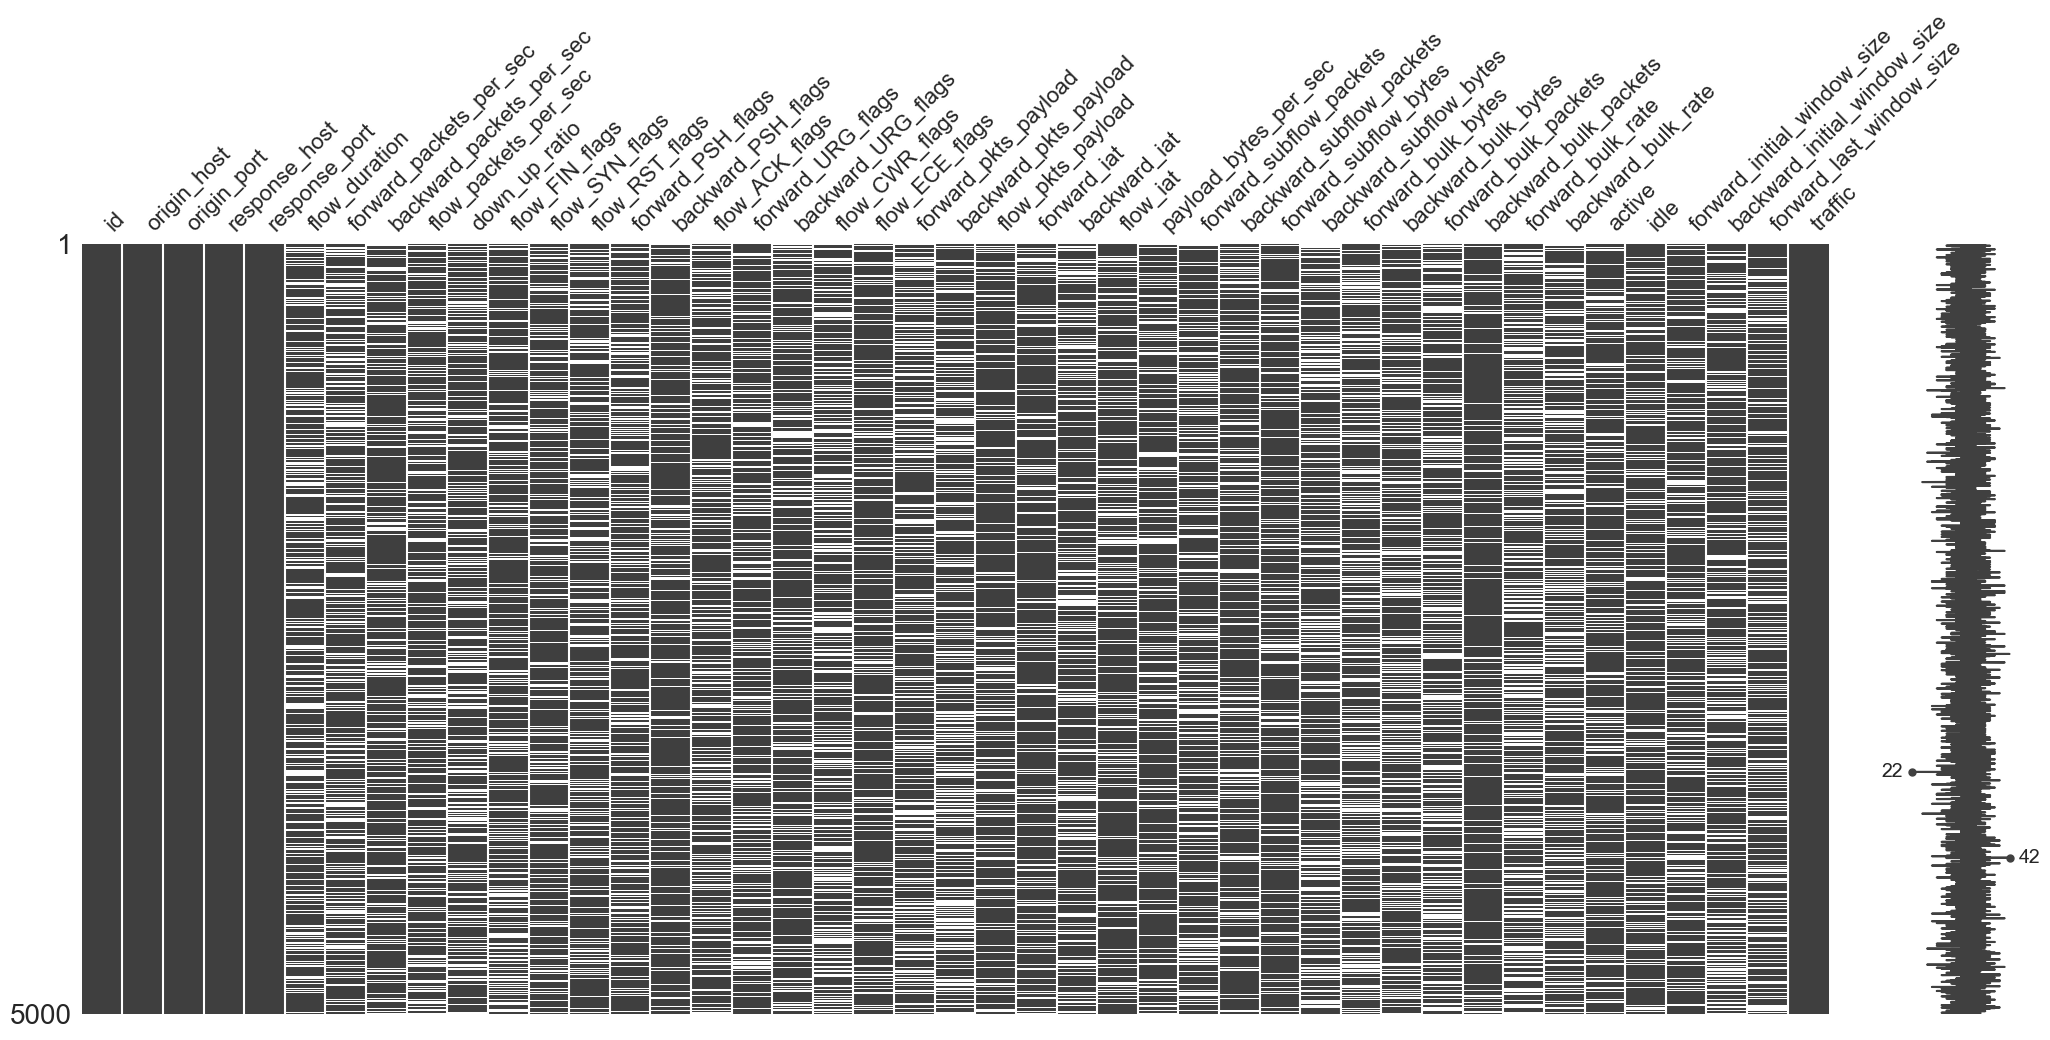

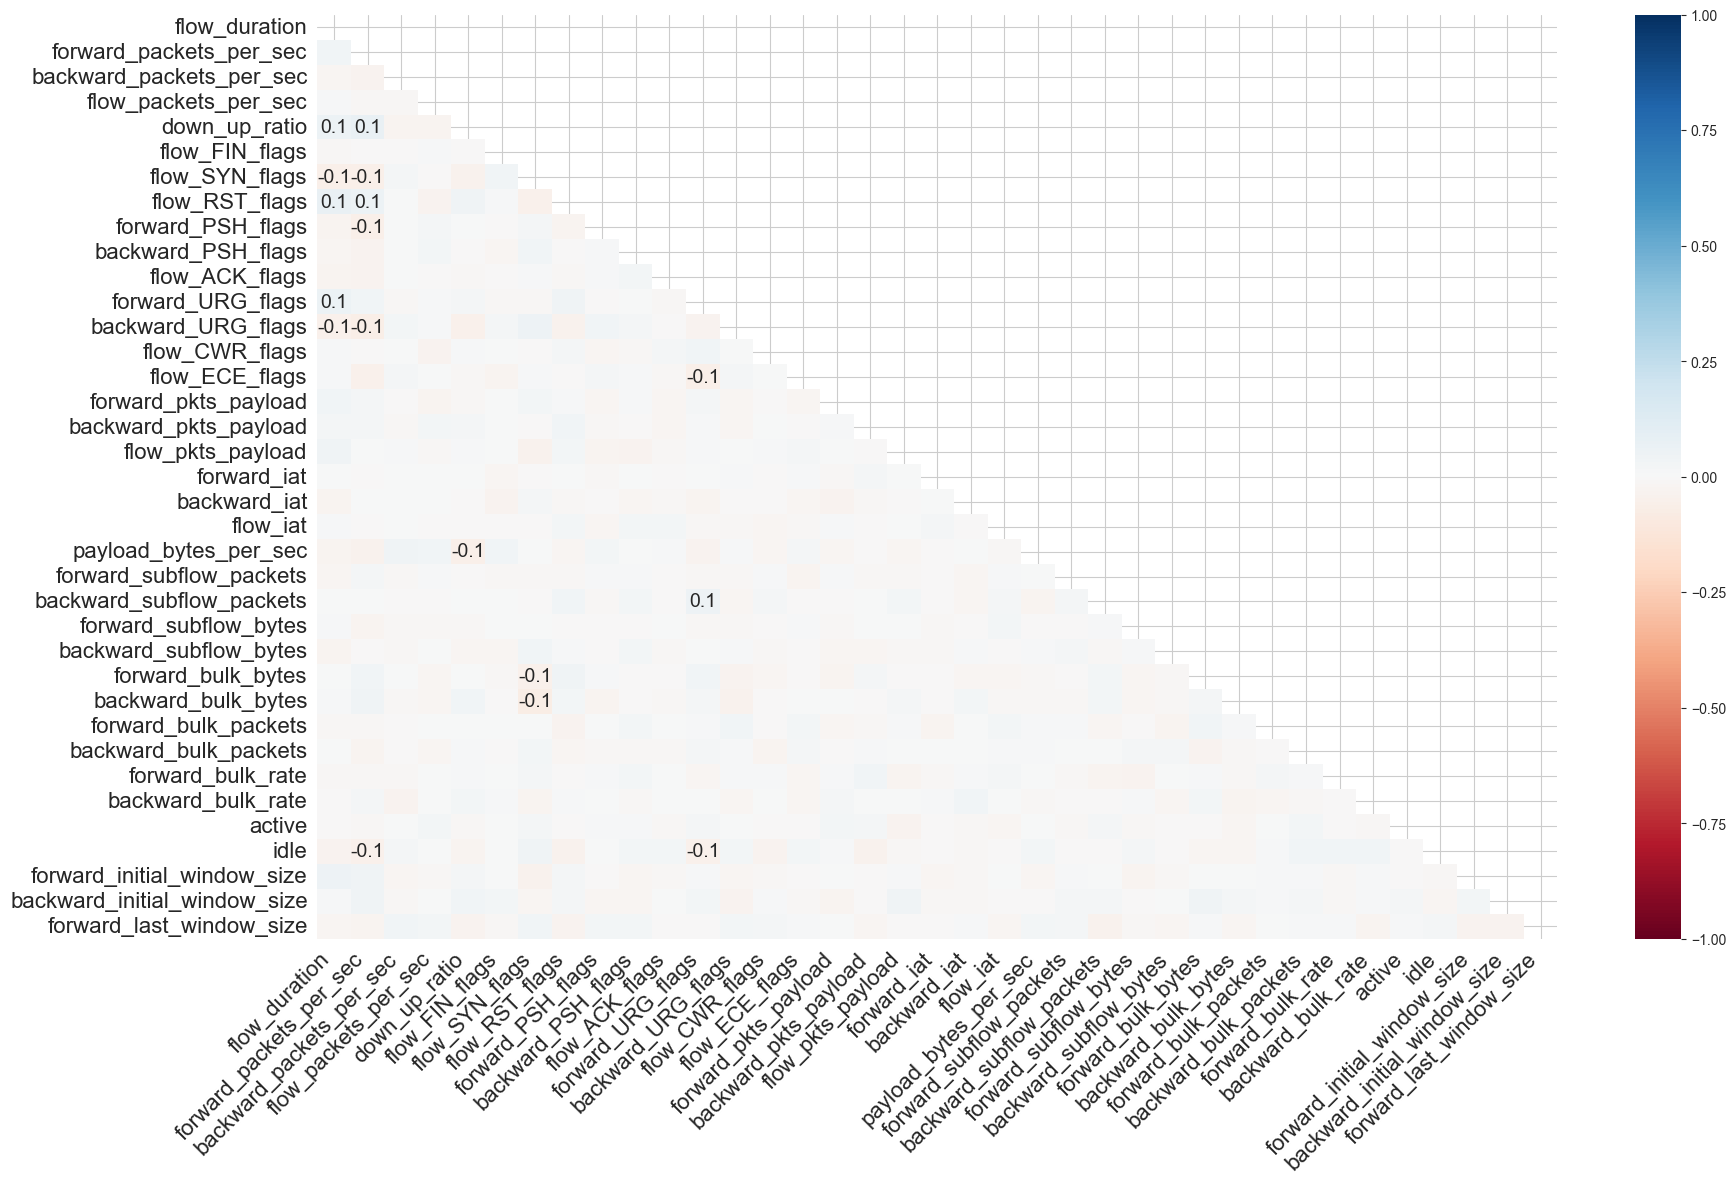

In [156]:
import missingno as msno

msno.matrix(data)
msno.heatmap(data)

In [157]:
def fill_packets(row):
    # Fill flow_packets_per_sec
    if pd.isna(row['flow_packets_per_sec']):
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    
    # Fill forward_packets_per_sec and backward_packets_per_sec
    if pd.isna(row['forward_packets_per_sec']) and not pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['backward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']):
        row['backward_packets_per_sec'] = row['forward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['forward_packets_per_sec']) and pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
        row['backward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
    
    # Fill down_up_ratio
    if not pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']) and row['forward_packets_per_sec'] != 0:
        row['down_up_ratio'] = row['backward_packets_per_sec'] / row['forward_packets_per_sec']
    
    # Fill flow_pkts_payload
    if pd.isna(row['flow_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']) and not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = (row['forward_pkts_payload'] + row['backward_pkts_payload']) / 2
        elif not pd.isna(row['forward_pkts_payload']):
            row['flow_pkts_payload'] = row['forward_pkts_payload']
        elif not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = row['backward_pkts_payload']
    
    # Fill forward_pkts_payload and backward_pkts_payload
    if pd.isna(row['forward_pkts_payload']) and pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['flow_pkts_payload']):
            row['forward_pkts_payload'] = row['flow_pkts_payload']
            row['backward_pkts_payload'] = row['flow_pkts_payload']
    elif pd.isna(row['forward_pkts_payload']):
        if not pd.isna(row['backward_pkts_payload']):
            row['forward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['backward_pkts_payload']
    elif pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']):
            row['backward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['forward_pkts_payload']
    
    return row

data = data.apply(fill_packets, axis=1)

In [158]:
miss_data = calculate_missing_values(data)
miss_data

,Missing Values,Proportion (%)
id,0,0.00
origin_host,0,0.00
origin_port,0,0.00
response_host,0,0.00
response_port,0,0.00
flow_duration,1418,28.36
forward_packets_per_sec,77,1.54
backward_packets_per_sec,77,1.54
flow_packets_per_sec,77,1.54
down_up_ratio,203,4.06


In [159]:
features_to_drop = miss_data[miss_data["Proportion (%)"] > 20].index
data_cleaned = data.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)

Dropped features: Index(['flow_duration', 'flow_FIN_flags', 'flow_SYN_flags', 'flow_RST_flags',
       'forward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
       'backward_URG_flags', 'flow_CWR_flags', 'backward_iat', 'flow_iat',
       'payload_bytes_per_sec', 'forward_subflow_packets',
       'backward_subflow_packets', 'backward_subflow_bytes',
       'forward_bulk_bytes', 'backward_bulk_bytes', 'forward_bulk_packets',
       'forward_bulk_rate', 'backward_bulk_rate', 'idle',
       'forward_initial_window_size', 'backward_initial_window_size',
       'forward_last_window_size'],
      dtype='object')


In [160]:
from sklearn.impute import KNNImputer

remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port', 'traffic']
traffic_col = data['traffic'].copy()
data = data.drop(columns=remove_col)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=5)

data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
data['traffic'] = traffic_col.values
data = data.reset_index(drop=True)
data.to_csv("data/processing/data_fill.csv", index=False)

In [161]:
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()

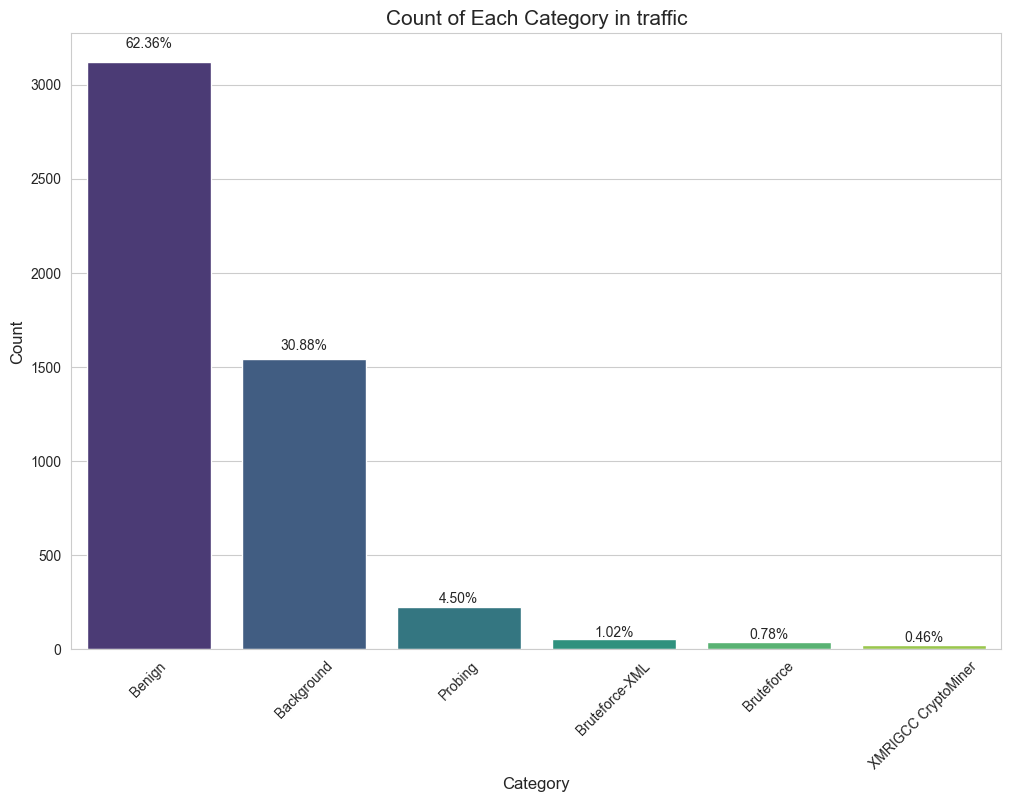

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [163]:
data.duplicated().sum()

376

In [164]:
def mean_by_traffic(data, output_file):
    mean_by_traffic_numerical = data.groupby('traffic')[numerical_columns].mean().round(2)
    mean_by_traffic_numerical.to_csv(output_file, index=True)
    print(mean_by_traffic_numerical)
    print(f"Mean values by traffic category have been saved to '{output_file}'.")

mean_by_traffic(data, 'data/processing/mean_by_traffic_numerical.csv')

                     flow_duration  forward_packets_per_sec   
traffic                                                       
Background                    9.11                  3306.08  \
Benign                        5.35                  1124.95   
Bruteforce                    4.60                    16.44   
Bruteforce-XML                9.49                     2.82   
Probing                       1.14                    35.85   
XMRIGCC CryptoMiner           1.49                     1.58   

                     backward_packets_per_sec  flow_packets_per_sec   
traffic                                                               
Background                            3293.72               6599.80  \
Benign                                1055.99               2180.94   
Bruteforce                              16.30                 32.74   
Bruteforce-XML                           2.56                  5.38   
Probing                                 41.35                 77.21  

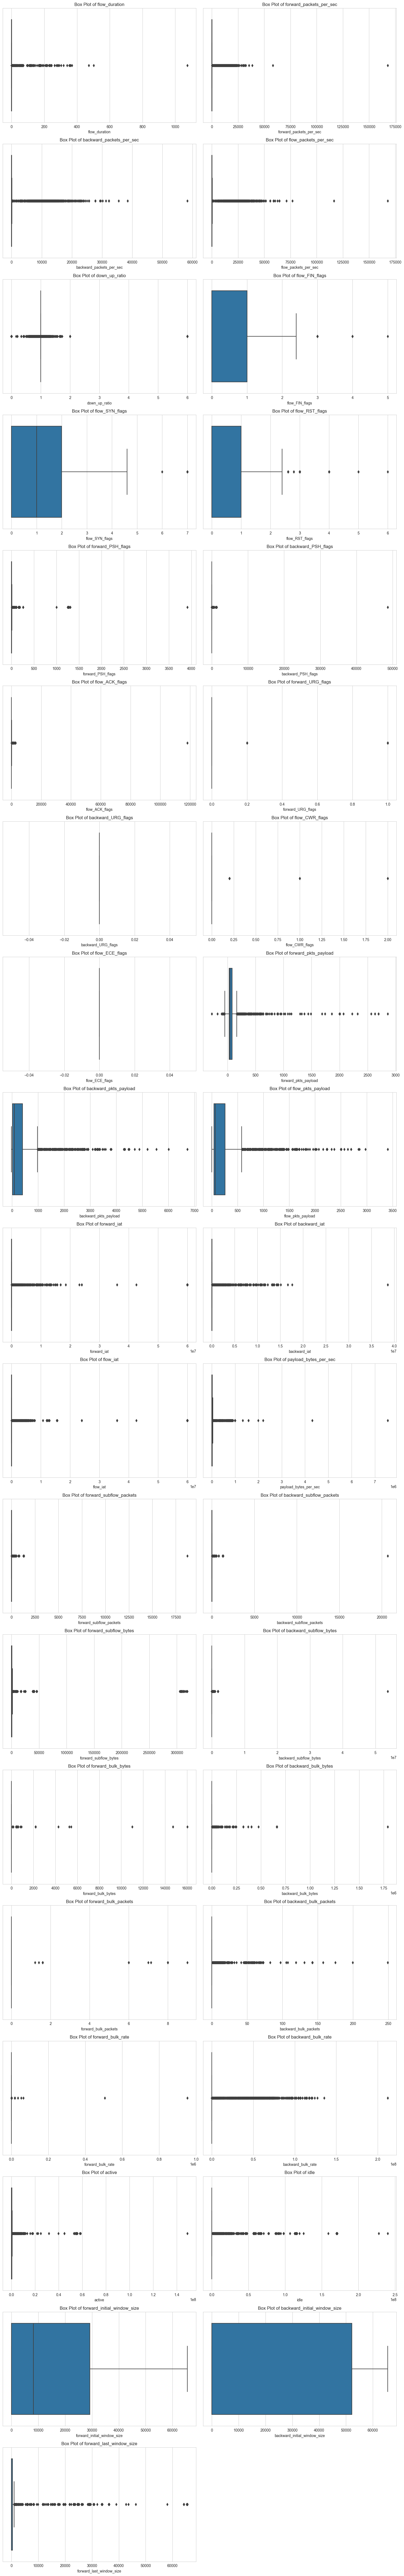

In [165]:
def plot_boxplots(data):
    num_cols=2
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

For big data problems, outliers are generally not a problem in fitting the regression to
be used in predicting new data. However, outliers are central to anomaly detection,
where finding outliers is the whole point. The outlier could also correspond to a case
of fraud or an accidental action. In any case, detecting outliers can be a critical busi‐
ness need.

In [166]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['traffic'], axis=1)  # Features 
y = data['traffic']                        # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train data: {} \nNumber of test data: {}".format(len(X_train), len(y_test)))

Number of train data: 4000 
Number of test data: 1000


In [167]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Melihat distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Menerapkan SMOTE untuk oversampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# Melihat distribusi kelas setelah SMOTE
print("Class Distribution after SMOTE:", Counter(y_train))

Distribusi kelas sebelum SMOTE: Counter({'Benign': 2480, 'Background': 1240, 'Probing': 190, 'Bruteforce-XML': 39, 'Bruteforce': 34, 'XMRIGCC CryptoMiner': 17})
Class Distribution after SMOTE: Counter({'Benign': 2480, 'Background': 2480, 'Bruteforce-XML': 2480, 'Probing': 2480, 'Bruteforce': 2480, 'XMRIGCC CryptoMiner': 2480})


In [168]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees', 'SVM']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42),
               SVC(kernel='rbf')]

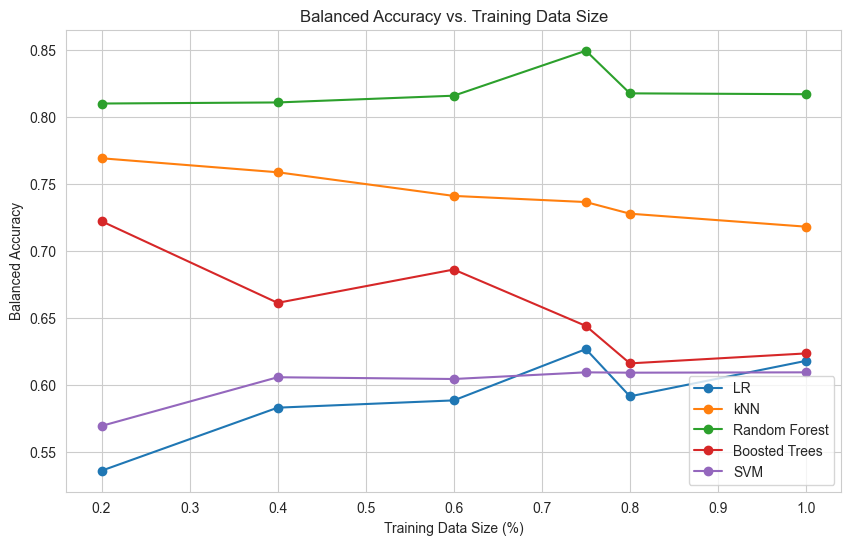

Optimal Balanced Accuracy for LR: 0.6266 with 75% of the training data.
Optimal Balanced Accuracy for kNN: 0.7691 with 20% of the training data.
Optimal Balanced Accuracy for Random Forest: 0.8493 with 75% of the training data.
Optimal Balanced Accuracy for Boosted Trees: 0.7221 with 20% of the training data.
Optimal Balanced Accuracy for SVM: 0.6093 with 75% of the training data.


In [169]:
from sklearn.metrics import balanced_accuracy_score

train_sizes = [0.20, 0.40, 0.60, 0.75, 0.80, 1.00]
balanced_accuracies = {name: [] for name in classifier_names}

optimal_balanced_accuracies = {name: (0, 0) for name in classifier_names}  # (accuracy, size)

for size in train_sizes:
    if size < 1.0:
        X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    else:
        X_partial_train, y_partial_train = X_train, y_train

    for name, model in zip(classifier_names, classifiers):
        model.fit(X_partial_train, y_partial_train)
        y_pred = model.predict(X_test)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        balanced_accuracies[name].append(balanced_acc)
        
        if balanced_acc > optimal_balanced_accuracies[name][0]:
            optimal_balanced_accuracies[name] = (balanced_acc, size)

# Plotting the results
plt.figure(figsize=(10, 6))

for name in classifier_names:
    plt.plot([0.20, 0.40, 0.60, 0.75, 0.80, 1.00], balanced_accuracies[name], marker='o', label=name)

plt.title('Balanced Accuracy vs. Training Data Size')
plt.xlabel('Training Data Size (%)')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()

for name in classifier_names:
    optimal_acc, optimal_size = optimal_balanced_accuracies[name]
    print(f"Optimal Balanced Accuracy for {name}: {optimal_acc:.4f} with {optimal_size * 100:.0f}% of the training data.")

In [170]:
import numpy as np
import seaborn as sns

def display_confusion_matrix(cmat, score, f1, best_model):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix for {}'.format(best_model), fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

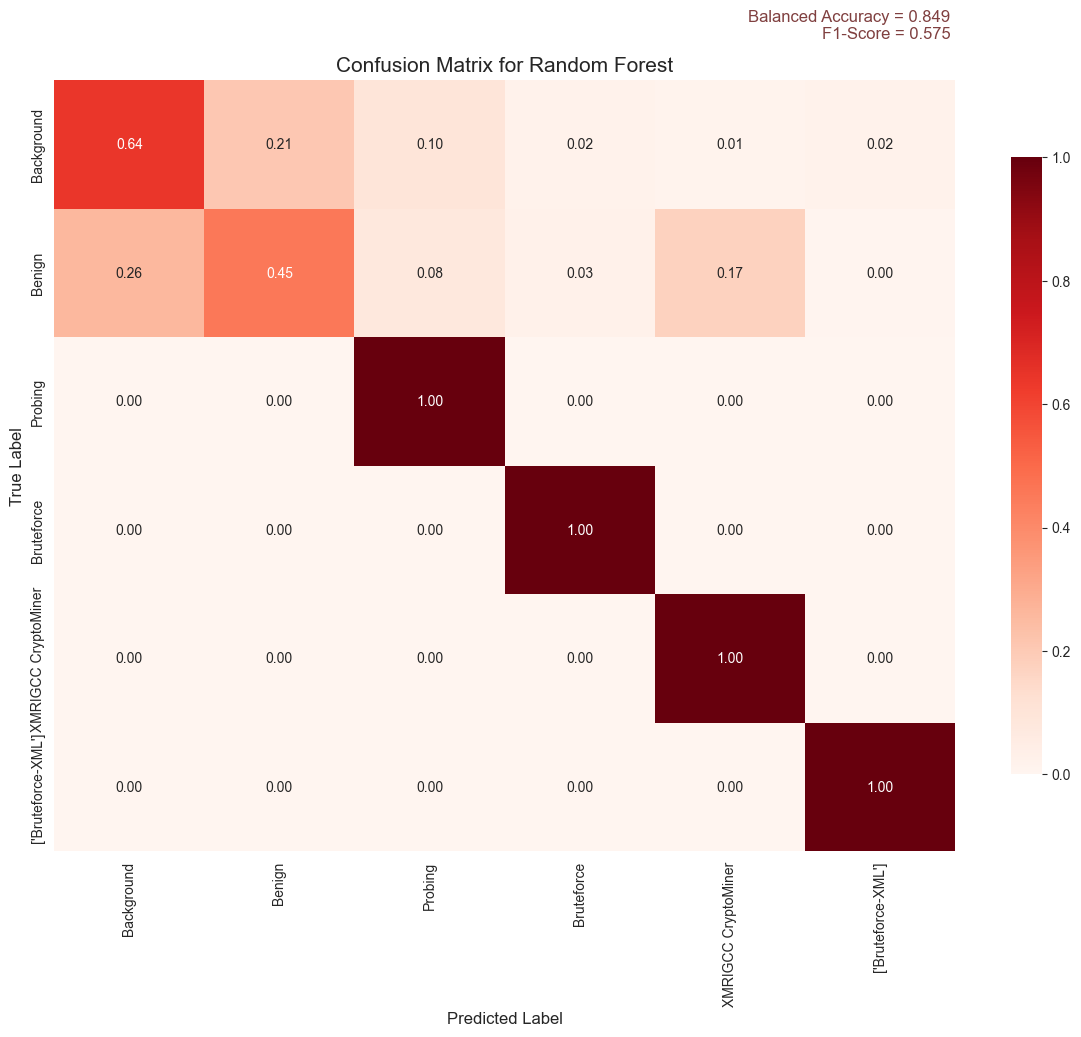

In [171]:
from sklearn.metrics import confusion_matrix, f1_score

best_model_name = max(optimal_balanced_accuracies, key=lambda name: optimal_balanced_accuracies[name][0])
optimal_acc, optimal_size = optimal_balanced_accuracies[best_model_name]

if optimal_size < 1.0:
    X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=optimal_size, random_state=42)
else:
    X_partial_train, y_partial_train = X_train, y_train

best_model = None
for name, model in zip(classifier_names, classifiers):
    if name == best_model_name:
        best_model = model
        best_model.fit(X_partial_train, y_partial_train)
        break

y_pred = best_model.predict(X_test)

cmat = confusion_matrix(y_test, y_pred, normalize='true')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 5: Display the confusion matrix
display_confusion_matrix(cmat, balanced_acc, f1, best_model_name)
